In [1]:
pip install tweepy

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [3]:
pip install transformers

In [4]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [39]:
import os
api_key = os.getenv("")

In [5]:
import tweepy
import pandas as pd

def fetch_tweets(query , num_tweets):
  api_key = ""
  api_secret_key = "xW2Vx4ylPUGRhw22hwQsD9qa1vnMizfLyRjGWlfjGCDEr8PtI1"
  access_token = "4881761260-QF541jugWT3cratmaKIaPnm2Uf63QYFjsL12dCr"
  access_token_secret = "Xk8VjK0eFrbSWAerbzbNEIPboMCXhgHniIlWTsGyvG6kp"

  auth = tweepy.OAuth1UserHandler(api_key, api_secret_key, access_token, access_token_secret)
  api = tweepy.API(auth)

  tweets_data = []
  for tweet in tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode="extended").items(num_tweets):
    tweets_data.append({'text':tweet.full_text})

  return pd.DataFrame(tweets_data)

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_text)


In [7]:
pip install newsapi-python

In [8]:
from newsapi import NewsApiClient

def fetch_news(query, from_date, to_date):
    api_key = ""
    newsapi = NewsApiClient(api_key=api_key)
    articles = newsapi.get_everything(q=query, language='en', from_param=from_date, to=to_date)

    return pd.DataFrame([{'title': a['title'], 'content': a['description'], 'date': a['publishedAt']} for a in articles['articles']])

In [9]:
from newsapi import NewsApiClient
import pandas as pd

def fetch_news(query, from_date, to_date):
    api_key = "cee32e41cfd84fd1827fe3a54455390c"
    newsapi = NewsApiClient(api_key=api_key)

    articles = newsapi.get_everything(q=query, language='en', from_param=from_date, to=to_date)

    news_data = []
    for a in articles['articles']:
        news_data.append({
            'text': f"{a['title']} {a['description']}",  # Combine title and description for sentiment
            'date': a['publishedAt'][:10]  # Extract only the date part
        })

    return pd.DataFrame(news_data)

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
from transformers import pipeline

def get_sentiment(text):
    sentiment_pipeline = pipeline("sentiment-analysis")
    sentiment_result = sentiment_pipeline(text)[0]
    return sentiment_result['label']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sentiment', data=df)
    plt.title('Sentiment Distribution')
    plt.show()

In [13]:
import streamlit as st

st.title("Market Sentiment AI")
query = st.text_input("Enter stock-related query (e.g., 'AAPL')")
num_tweets = st.slider("Number of tweets to analyze", 10, 500)

if st.button("Analyze"):
    tweets_df = fetch_tweets(query, num_tweets)
    tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)
    tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment_vader)

    st.write(tweets_df)
    plot_sentiment_distribution(tweets_df)

2025-01-10 22:24:50.653 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.169 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-10 22:24:51.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 22:24:51.198 Session state does not 

In [14]:
import yfinance as yf
import pandas as pd

def fetch_stock_prices(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    df.reset_index(inplace=True)
    df = df[['Date', 'Close']]
    df['Date'] = pd.to_datetime(df['Date']).dt.date  # Convert to date only for merge
    return df

In [15]:
def calculate_sentiment_correlation(sentiment_df, stock_df):
    # Convert dates for joining
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date
    stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

    # Group by date and calculate average sentiment score
    sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    sentiment_df['sentiment_score'] = sentiment_df['sentiment'].map(sentiment_score_map)
    sentiment_avg_df = sentiment_df.groupby('Date').mean().reset_index()

    # Merge sentiment and stock data
    merged_df = pd.merge(stock_df, sentiment_avg_df, on='Date', how='inner')

    # Calculate Pearson correlation coefficient
    correlation = merged_df[['Close', 'sentiment_score']].corr().iloc[0, 1]

    print(f"Correlation between stock price and sentiment score: {correlation:.2f}")

    return merged_df, correlation

In [16]:
import matplotlib.pyplot as plt

def plot_sentiment_vs_stock_price(merged_df):
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price', color='blue')
    plt.plot(merged_df['Date'], merged_df['sentiment_score'], label='Sentiment Score', color='red')
    plt.title('Sentiment Score vs Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [26]:
!pip install nltk
import nltk
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [36]:
# New news fetching
from_date = "2024-12-30"
to_date = "2025-01-10"
query = "AAPL"
news_df = fetch_news(query, from_date, to_date)
news_df['Date'] = pd.to_datetime(news_df['date']).dt.date  # Format date
news_df['Date'] = pd.to_datetime(news_df['date']).dt.date  # Format date
news_df['cleaned_text'] = news_df['text'].apply(preprocess_text)
news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment_vader)

In [32]:
def calculate_sentiment_correlation(sentiment_df, stock_df):
    # Convert dates for joining
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date
    stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

    # Mapping sentiment to numeric scores
    sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    sentiment_df['sentiment_score'] = sentiment_df['sentiment'].map(sentiment_score_map)

    # Ensure that sentiment_score is numeric
    sentiment_df['sentiment_score'] = pd.to_numeric(sentiment_df['sentiment_score'], errors='coerce')

    # Group by date and calculate the average sentiment score
    sentiment_avg_df = sentiment_df.groupby('Date').agg({'sentiment_score': 'mean'}).reset_index()

    # Merge sentiment and stock data
    merged_df = pd.merge(stock_df, sentiment_avg_df, on='Date', how='inner')

    # Calculate Pearson correlation coefficient
    correlation = merged_df[['Close', 'sentiment_score']].corr().iloc[0, 1]

    print(f"Correlation between stock price and sentiment score: {correlation:.2f}")

    return merged_df, correlation

Correlation between stock price and sentiment score: 0.22


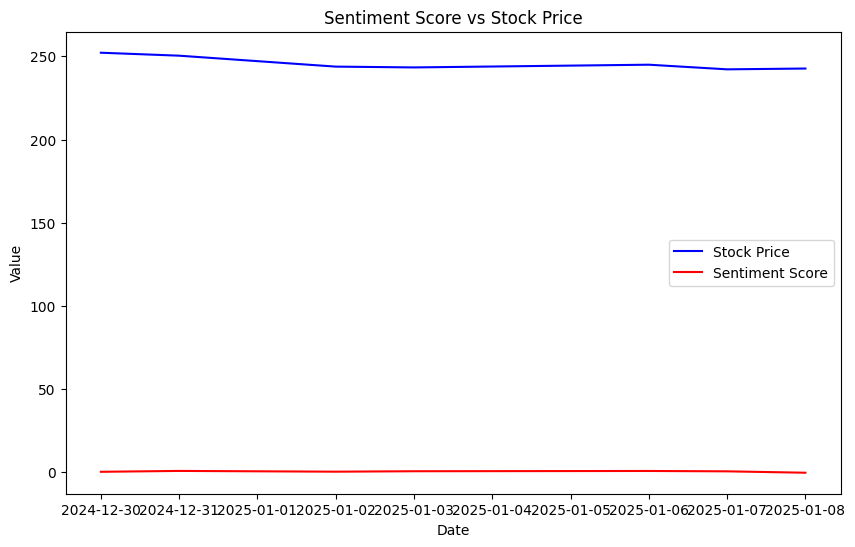

In [37]:
# Fetch stock prices
stock_prices_df = fetch_stock_prices(query, from_date, to_date)

# Calculate correlation
merged_df, correlation = calculate_sentiment_correlation(news_df, stock_prices_df)

# Plot sentiment vs stock price
plot_sentiment_vs_stock_price(merged_df)

In [ ]:


if __name__ == "__main__":
    query = "AAPL"  # Stock ticker for Apple Inc.
    num_tweets = 100
    start_date = "2025-01-09"
    end_date = "2025-01-10"

    # Step 1: Fetch and analyze sentiment
    tweets_df = fetch_tweets(query, num_tweets)
    tweets_df['Date'] = pd.to_datetime('today').date()  # Add date for demo purposes
    tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)
    tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment_vader)

    # Step 2: Fetch stock price data
    stock_prices_df = fetch_stock_prices(query, start_date, end_date)

    # Step 3: Correlate and visualize
    merged_df, correlation = calculate_sentiment_correlation(tweets_df, stock_prices_df)
    plot_sentiment_vs_stock_price(merged_df)